<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, Analysis and Security</h1>

<h2 align='center'> Homework Assessment 03</h2>

*****

Back from the break, and what a way to start ! Another set of questions !
The folloing **4 questions** should test your understanding of the lecture and lab material taught during the lectures and the lab exercises in **Weeks 5 & 6**. In the **next lab (Lab 06)**, you'll be asked to complete any one of these exercises by your tutor in **Exam Mode**. Upon completion, you'll be marked by your tutor, based on the correctness and completeness of your solution.

In [2]:
# RUN THIS CELL TO IMPORT THE REQUIRED MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
plt.style.use('seaborn')

In [3]:
mobile_data = pd.read_csv('data/mobiles.csv')
car_data = pd.read_csv('data/supercars.csv')

### Dataset 1: Mobile Madness

Mobile phones are constantly envolving and the prices are only increasing as time goes on. Is there a rhyme or reason to the pricing? We hope to use the dataset to find out. The dataset `mobiles` has the following features:

| **Feature** | **Description** |
| ----------- | --------------- |
| blue        | Whether device has bluetooth {Yes: 1, No: 0}|
| clock_speed | speed of the processor |
| dual_sim    | whether the device can hold two unique sim cards {Yes: 1, No: 0} |
| fc          | Megapixels in the front camera |
| four_g      | Whether the device is 4g compatible {Yes: 1, No: 0} |
| int_memory  | Internal Memory of the device (in GB) |
| n_cores     | Number of Cores in the processor |
| pc          | Back Camera Megapixels |
| ram         | RAM of device (in MB) |
| sc_h        | Screen Height |
| sc_w        | Screen Width |
| talk_time   | Time it takes on a call to drain the battery on a 3G call from 100% to 0%|
| three_g     | Whether the device is 3G compatible {Yes: 1, No: 0} |
| touch_screen| Whether the device has a touchscreen {Yes: 1, No: 0} |
| wifi        | Whether the device has wifi compatability {Yes: 1, No: 0} | 
| price_range | Price range of the device {Low: 0, Medium: 1, High: 2, Very High: 3} |

### Dataset 2: Supreme Supercars

While we have worked with car datasets before, sometimes we only want to work with the best. Below is the features present within the `supercars` dataset

| **Feature** | **Description** |
| ----------- | --------------- |
| car_full_nm        | Full name of car|
| horsepower_bhp | Input break horsepower of the car |
| rpm_horsepower_measure_point    | RPM the horsepower was measured at |
| torque_lb_ft          | Torque (pounds per foot) |
| rpm_torque_measure_point      | RPM the torque was measured at |
| car_0_60_time_seconds  | Time for car to reach 0-60 |
| engine_size_cc     | Engine size (cubic cms) |
| engine_size_ci          | Engine size (cubic in) |
| top_speed_mph         | Top Speed (Miles per hour) |
| top_speed_kph        | Top Speed (KM per hour) |
| horsepower_per_ton_bhp        | BHP per ton |
| year   | Year made |
| decade     | Decade of release |
| make_nm | Manufacturer of Vehicle |
| car_weight_tons        | Car weight in tons | 
| torque_per_ton | Torque per ton |

### Exercise 1: Lets talk prices (Using Dataset #1)

Xu poses of the question of whether the `talk time` of a device increases as the `price range` increases. Visualise the relationship between the price range categories and the average talk time, and explain the correlation (or lack of) between the two variables.

Text(0.5, 1.0, 'price range vs average talk time')

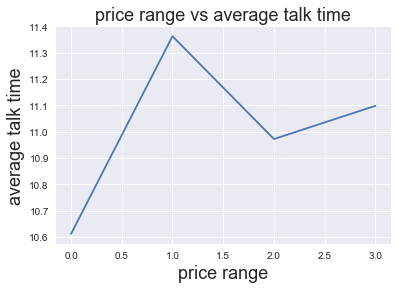

In [4]:
# Enter code here
# tt_vs_pr = mobile_data.groupby('price_range', as_index = False)[['talk_time']].mean()
tt_vs_pr = mobile_data.groupby('price_range').talk_time.mean()
plt.plot(mobile_data.price_range.sort_values().unique(), tt_vs_pr)
plt.xlabel('price range', fontsize = 18)
plt.ylabel('average talk time', fontsize = 18)
plt.title('price range vs average talk time', fontsize = 18)

#### Explination of Correlation
    - Add Explination here
    Explaination: talk time only increases in the 0-1 price range. It decreases with price in the 1-2 range and then raises slowly in the range 2-3.

### Exercise 2: More Power! (Using Dataset #2)

Power isn't everything in a car, but it certainly helps. With 1500 different supercars of the previous 8 decades, it will be interesting to see how times have changed over the past 80 years. Your task is as follows:
- Provide the mean, standard deviation, min and max values of `horsepower_bhp` and `engine_size_cc`
- Provide the **Variance** of `horsepower_bhp` for cars in their respective decades. Provide the measure of variability for each decade as specified by the `decade` column in the DataFrame.

In [5]:
# Enter Code Here
# Statistics of items
hp = car_data.horsepower_bhp
es = car_data.engine_size_cc
print('mean: ', hp.mean(), ' ', es.mean(), '\n','standard deviation: ', hp.std(), ' ', es.std(), '\n','max:', hp.max(), es.max(), '\n', 'min: ',hp.min(), es.min())
hp_dc = car_data.groupby('decade').horsepower_bhp.var()
car_data.decade = car_data.decade.str[:4]
car_data.decade = pd.to_numeric(car_data.decade)
mov = car_data.decade.var()
print(hp_dc, '\n', mov)

mean:  304.65589353612165   3594.7680608365017 
 standard deviation:  163.01043952041215   1737.4141065086992 
 max: 1184 8382.0 
 min:  34 0.0
decade
1930s     7688.000000
1940s      714.142857
1950s     7004.890977
1960s    10925.671723
1970s    11098.572000
1980s     7709.278032
1990s    13474.160759
2000s    27391.096419
2010s    37205.000693
Name: horsepower_bhp, dtype: float64 
 306.5119392920874


### Exercise 3: This Makes My Head Score (Using Dataset #1)

The score of any machine learning model will always be an important factor for determining how good the data you produce is, but there may be many different ways to do this. Your task is as follows:
- Seperate the data such that your target column is `price_range`
- Using the function provided to test the features, find the **smallest subset of the possible features** such that the **score of the model is over 0.4** 

Note: The classifier may return different values each time you run it for the same data since it will always start at a different point for determining the split. You're welcome to call the function within a loop to check the max possible value
Note_2: If you use `price_range` in your features to predict `price_range`, you will receive an automatic grade of 0. This is a trivial model.

In [6]:
# Testing Function
def scoring25(x, y, iterations=50):
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)
    sgd = SGDClassifier(max_iter=iterations, tol=1e-3)
    sgd.fit(x_train,y_train)
    return sgd.score(x_test, y_test)

In [18]:
# TODO: Select the most appropiate features as per the question out of the dataset and call the function above.
# Note: If you wish for the model to train more on the data until it reaches convergence, you can simply add an 'iterations=number' (where number is the number of iterations) to train the data for longer
y = mobile_data.price_range
all_x = mobile_data.drop('price_range', axis = 1)
single_score = []
max_scores = []
for i in range(len(all_x.columns)):
    single_score.append(scoring25(np.array(all_x[all_x.columns[i]]).reshape(-1,1), y, iterations=200))
temp = np.array(single_score)
a = np.argsort(temp)[-3:][::-1]
for i in range(3):
    max_scores.append(all_x.columns[a[i]])
print(scoring25(all_x[max_scores], y, iterations = 150), '\n', max_scores)

0.434 
 ['fc', 'ram', 'sc_w']


### Exercise 4: Predicting Speed (Using Dataset #2)

Linear Regression, back once again! We hope to use the data we have to impliment a linear regression model that will predict the `car_0_60_time_seconds` feature. Impliment a Linear Regression function that uses **as many features as possible** while still having an R^2 over 0.35

In [25]:
# Testing function
def lmscore(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=3)
    lm = LinearRegression()
    lm.fit(x_train, y_train)
    return lm.score(x_test, y_test)

In [29]:
# TODO: Select the most appropiate features as per the question out of the dataset and call the function above.
# print(lmscore(np.array(car_data.rpm_horsepower_measure_point).reshape(-1, 1),car_data.car_0_60_time_seconds), '\n')
result = car_data.car_0_60_time_seconds
features = car_data.drop(['car_0_60_time_seconds', 'car_full_nm', 'make_nm'], axis = 1)
print(lmscore(features, result), '\n', 'use in total ', features.shape[1], ' features')

0.516952749273329 
 use in total  14  features
